### Technical Analysis Indicator: Bollinger Bands

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
ticker = 'KO'
start = '2011-12-30'
end = '2022-01-01'
data = pd.DataFrame()

[*********************100%%**********************]  1 of 1 completed


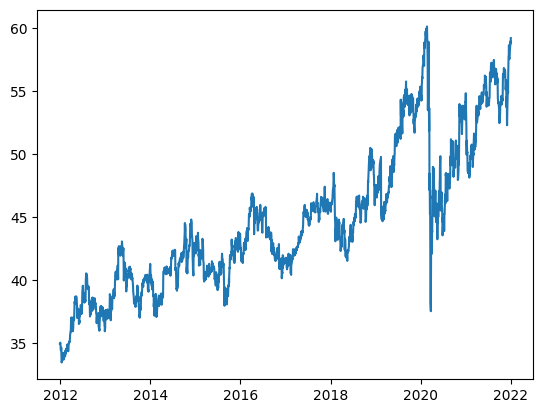

In [4]:
data["Price"] = yf.download(ticker, start, end)['Close']
plt.plot(data['Price'])

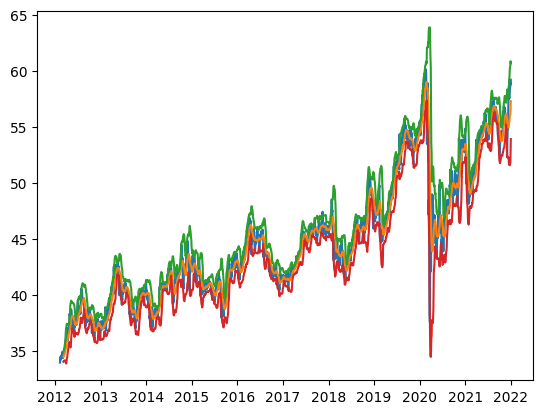

In [19]:
lookback = 20
width = 2
fee = 0.0001
data['MA'] = data['Price'].rolling(lookback).mean()
data['Std'] = data['Price'].rolling(lookback).std()
data['Upper'] = data['MA'] + width*data['Std']
data['Lower'] = data['MA'] - width*data['Std']
plt.plot(data['Price'])
plt.plot(data['MA'])
plt.plot(data['Upper'])
plt.plot(data['Lower'])
plt.show()

In [20]:
data['Return'] = data['Price'].pct_change().shift(-1).fillna(0)
data['Impulse'] = (data['Price'] - data['Lower'])/(data['Upper'] - data['Lower'])
data = data.dropna(axis=0)
old_signal = 0
signals = np.array([])
gross = np.array([])
net = np.array([])

In [21]:
for t in range(0, len(data)):
    if data['Impulse'][t] >= 1:
        signal = -1
    elif data['Impulse'][t] <= 0:
        signal = 1
    elif old_signal*(data['Impulse'][t] - 0.5) > 0:
        signal = 0
    else:
        signal = old_signal
        
    gross_return = signal * data['Return'][t]
    net_return = gross_return - fee*abs(signal - old_signal)
    signals = np.append(signals, signal)
    gross = np.append(gross, gross_return)
    net = np.append(net, net_return)
    old_signal = signal

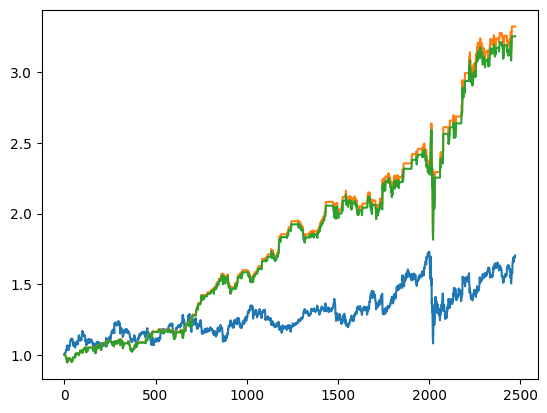

In [22]:
plt.plot(np.append(1, np.cumprod(1+data['Return'])))
plt.plot(np.append(1, np.cumprod(1+gross)))
plt.plot(np.append(1, np.cumprod(1+net)))
plt.show()